In [1]:
!pip install pandas matplotlib seaborn scikit-learn

        Instance     Offer        Win    Limited      Bonus
count  12.000000  12.00000  12.000000  12.000000  12.000000
mean    6.500000  10.75000  12.333333   8.750000   4.416667
std     3.605551   5.95628   9.745240   4.882715   3.088346
min     1.000000   3.00000   2.000000   2.000000   1.000000
25%     3.750000   5.75000   3.000000   4.750000   1.750000
50%     6.500000  10.00000  11.500000   8.500000   4.000000
75%     9.250000  15.50000  21.250000  12.500000   7.250000
max    12.000000  20.00000  25.000000  16.000000   9.000000


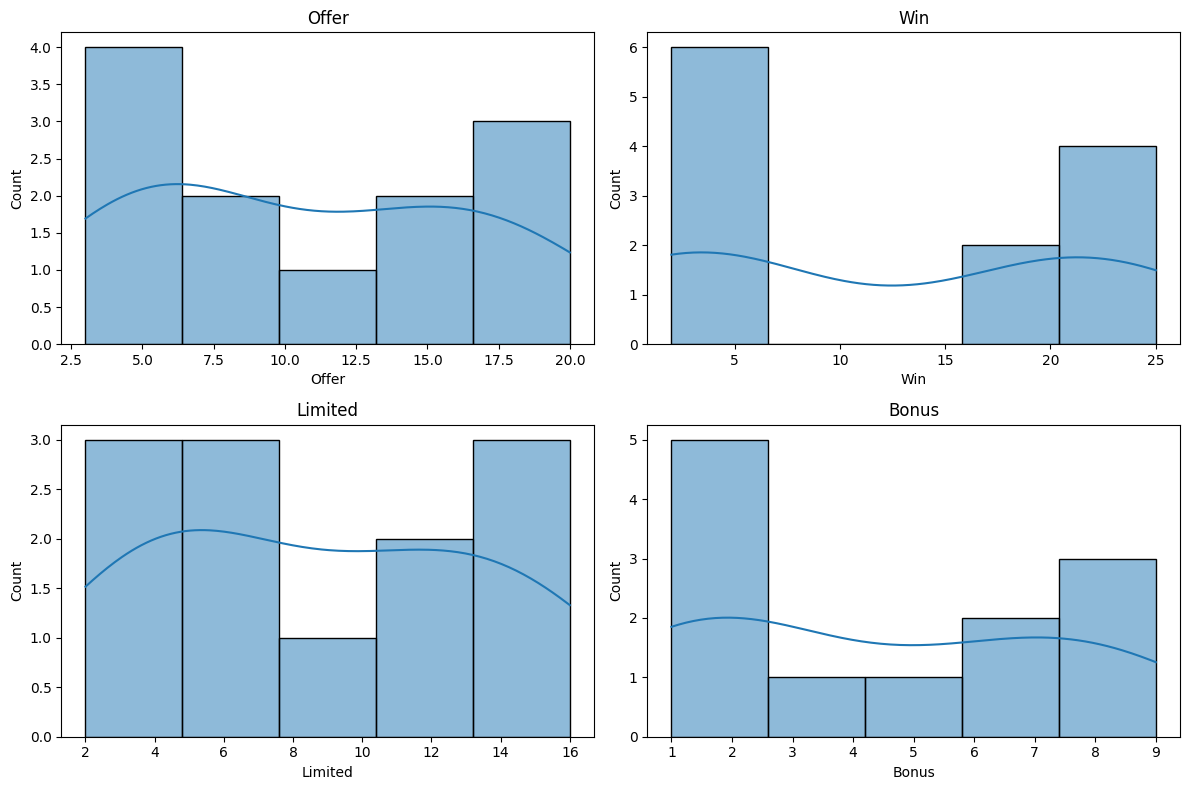

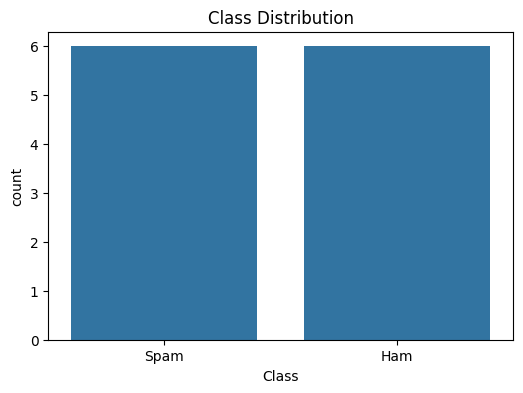

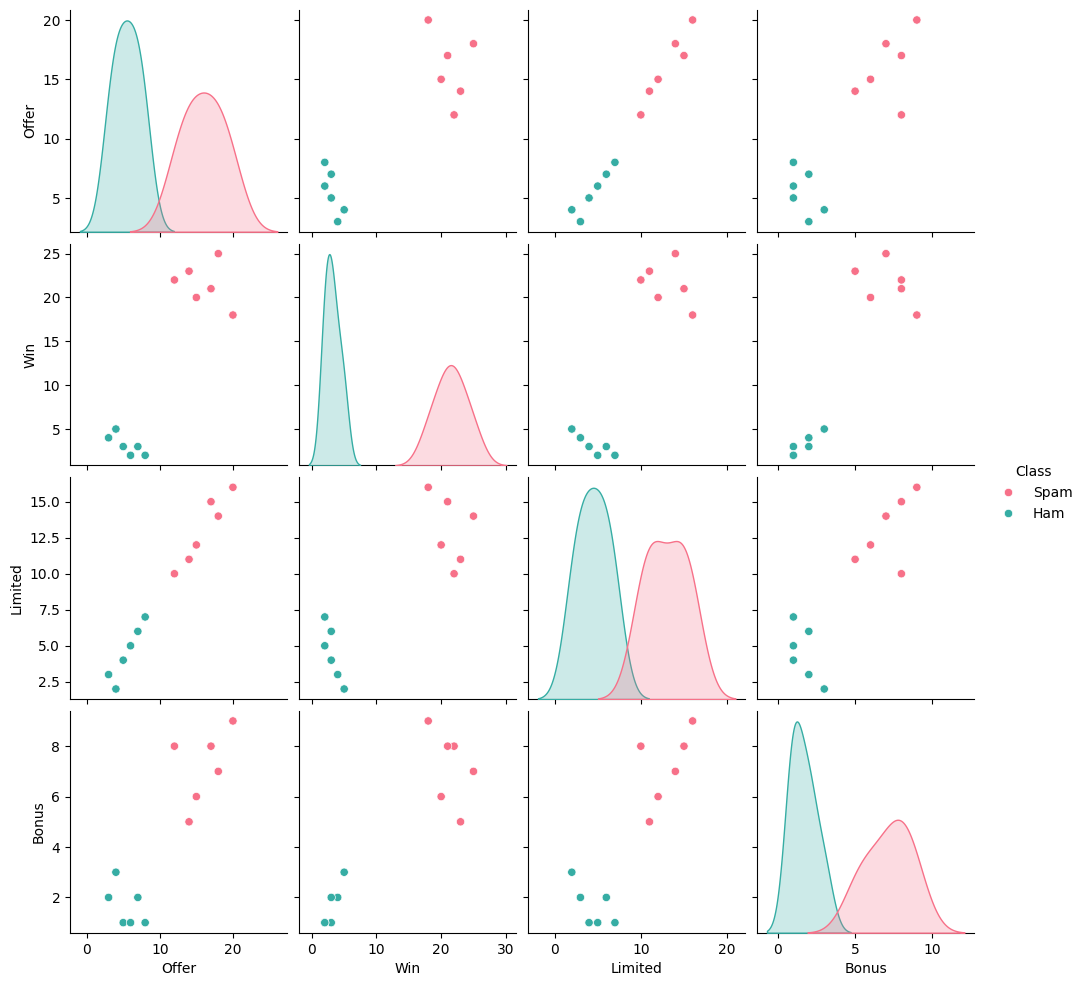

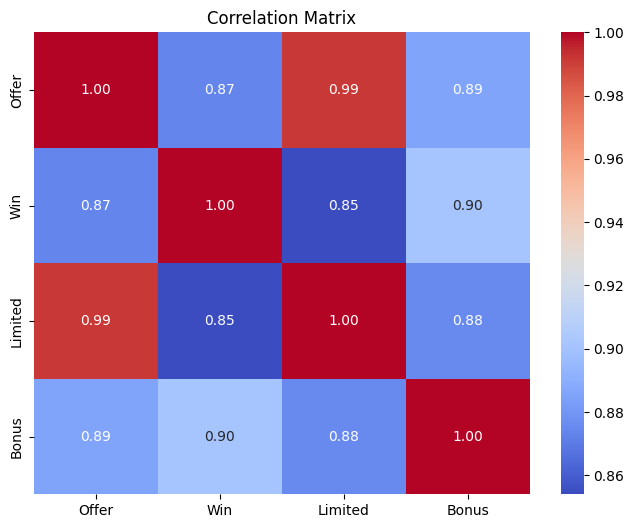

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data according to GCR
data = {
    'Instance': list(range(1, 13)),
    'Offer': [15, 5, 12, 3, 18, 6, 20, 7, 14, 4, 17, 8],
    'Win': [20, 3, 22, 4, 25, 2, 18, 3, 23, 5, 21, 2],
    'Limited': [12, 4, 10, 3, 14, 5, 16, 6, 11, 2, 15, 7],
    'Bonus': [6, 1, 8, 2, 7, 1, 9, 2, 5, 3, 8, 1],
    'Class': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}
df = pd.DataFrame(data)

print(df.describe())

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[1:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

# Pair Plot
sns.pairplot(df.drop('Instance', axis=1), hue='Class', palette='husl')
plt.show()

# Correlation Matrix (excluding 'Class' column)
plt.figure(figsize=(8, 6))
numeric_df = df.drop(['Instance', 'Class'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

In [3]:
!pip install scipy

In [4]:
import pandas as pd

# Load the dataset
data = {
    'Instance': list(range(1, 13)),
    'Offer': [15, 5, 12, 3, 18, 6, 20, 7, 14, 4, 17, 8],
    'Win': [20, 3, 22, 4, 25, 2, 18, 3, 23, 5, 21, 2],
    'Limited': [12, 4, 10, 3, 14, 5, 16, 6, 11, 2, 15, 7],
    'Bonus': [6, 1, 8, 2, 7, 1, 9, 2, 5, 3, 8, 1],
    'Class': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}

df = pd.DataFrame(data)

# Example of feature engineering: Create a new feature 'Total' as the sum of 'Offer', 'Win', 'Limited', and 'Bonus'
df['Total'] = df['Offer'] + df['Win'] + df['Limited'] + df['Bonus']

print(df)


    Instance  Offer  Win  Limited  Bonus Class  Total
0          1     15   20       12      6  Spam     53
1          2      5    3        4      1   Ham     13
2          3     12   22       10      8  Spam     52
3          4      3    4        3      2   Ham     12
4          5     18   25       14      7  Spam     64
5          6      6    2        5      1   Ham     14
6          7     20   18       16      9  Spam     63
7          8      7    3        6      2   Ham     18
8          9     14   23       11      5  Spam     53
9         10      4    5        2      3   Ham     14
10        11     17   21       15      8  Spam     61
11        12      8    2        7      1   Ham     18


# PCA

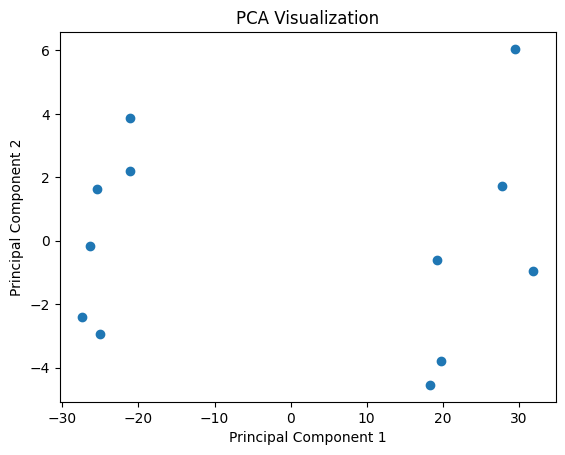

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop non-numeric columns for PCA
df_numeric = df.drop(columns=['Instance', 'Class'])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Visualize PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


# Outlier Detection

In [6]:
from sklearn.ensemble import IsolationForest

# Create and fit Isolation Forest model
clf = IsolationForest(random_state=0)
outliers = clf.fit_predict(df_numeric)

# Add outlier column to DataFrame
df['Outlier'] = outliers

print(df)


    Instance  Offer  Win  Limited  Bonus Class  Total  Outlier
0          1     15   20       12      6  Spam     53       -1
1          2      5    3        4      1   Ham     13        1
2          3     12   22       10      8  Spam     52       -1
3          4      3    4        3      2   Ham     12       -1
4          5     18   25       14      7  Spam     64       -1
5          6      6    2        5      1   Ham     14        1
6          7     20   18       16      9  Spam     63       -1
7          8      7    3        6      2   Ham     18        1
8          9     14   23       11      5  Spam     53       -1
9         10      4    5        2      3   Ham     14       -1
10        11     17   21       15      8  Spam     61        1
11        12      8    2        7      1   Ham     18       -1


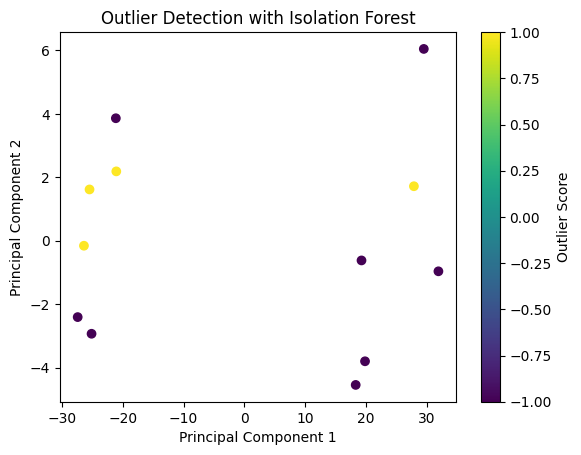

In [7]:
import matplotlib.pyplot as plt

# Visualize Outlier Detection
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=outliers, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Detection with Isolation Forest')
plt.colorbar(label='Outlier Score')
plt.show()


In [8]:
!pip install eli5

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Create and fit RandomForestClassifier
X = df_numeric
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Calculate permutation feature importances
def permutation_importance(model, X, y, metric, random_state=42):
    baseline = metric(model, X, y)
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(model, X, y)
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

def accuracy(model, X, y):
    return (model.predict(X) == y).mean()

feature_importances = permutation_importance(rf, X_test, y_test, accuracy)
print(feature_importances)

[0. 0. 0. 0. 0.]


First few rows of the dataset:
   Instance  Offer  Win  Limited  Bonus Class  Total  Outlier
0         1     15   20       12      6  Spam     53       -1
1         2      5    3        4      1   Ham     13        1
2         3     12   22       10      8  Spam     52       -1
3         4      3    4        3      2   Ham     12       -1
4         5     18   25       14      7  Spam     64       -1

Summary statistics of numerical columns:
        Instance     Offer        Win    Limited      Bonus      Total  \
count  12.000000  12.00000  12.000000  12.000000  12.000000  12.000000   
mean    6.500000  10.75000  12.333333   8.750000   4.416667  36.250000   
std     3.605551   5.95628   9.745240   4.882715   3.088346  22.748127   
min     1.000000   3.00000   2.000000   2.000000   1.000000  12.000000   
25%     3.750000   5.75000   3.000000   4.750000   1.750000  14.000000   
50%     6.500000  10.00000  11.500000   8.500000   4.000000  35.000000   
75%     9.250000  15.50000  21.250000

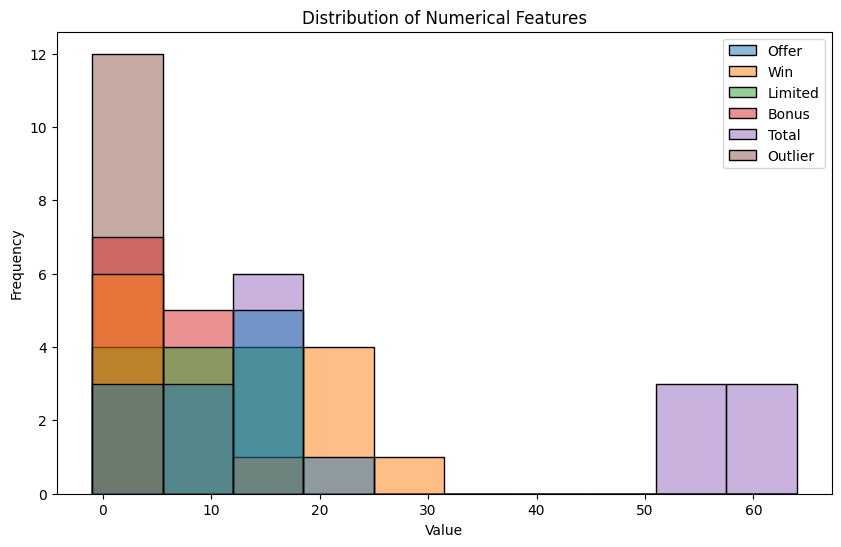

In [10]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualize the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df.drop(columns=['Instance', 'Class']), bins=10)
plt.title('Distribution of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# # Visualize the distribution of the target variable
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='Class')
# plt.title('Distribution of Target Variable (Class)')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X = df.drop(columns=['Instance', 'Class'])  # Features
y = df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM classifier:", accuracy)


Accuracy of SVM classifier: 1.0


In [12]:
!pip install mlxtend

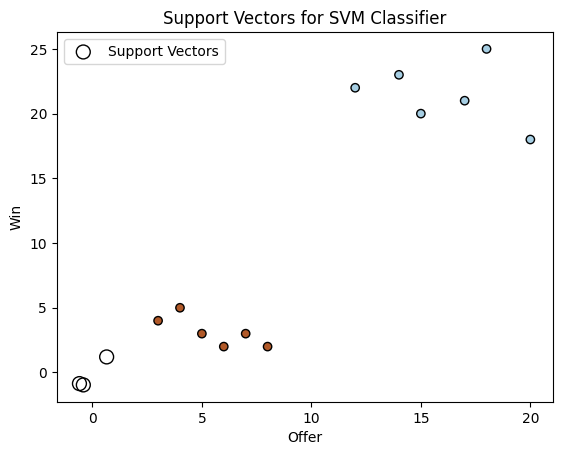

In [13]:
import matplotlib.pyplot as plt

# Define feature1 and feature2 based on your dataset attributes
feature1 = 'Offer'
feature2 = 'Win'

# Convert class labels to numeric values
class_mapping = {'Spam': 0, 'Ham': 1}
y_numeric = y.map(class_mapping)

# Plot data points
plt.scatter(X[feature1], X[feature2], c=y_numeric, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', linewidths=1, label='Support Vectors')

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Support Vectors for SVM Classifier')
plt.legend()

# Show the plot
plt.show()


ValueError: Argument Z must be 2-dimensional.

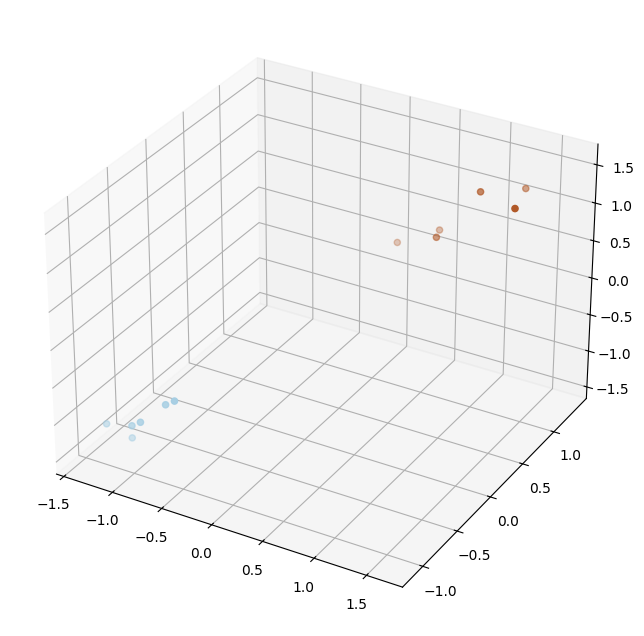

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Select features for visualization
feature1 = 'Offer'
feature2 = 'Win'
feature3 = 'Limited'

# Extract features and target variable
X = df[[feature1, feature2, feature3]]
y = df['Class']

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_scaled, y_encoded)

# Create meshgrid for visualization
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
z_min, z_max = X_scaled[:, 2].min() - 1, X_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict the class for each point in the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)


# Plot the decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_encoded, cmap=plt.cm.Paired)

# Create 3D surface plot
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.5, cmap=plt.cm.Paired)

# Set labels and title
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('SVM Decision Boundary in 3D')

# Show the plot
plt.show()



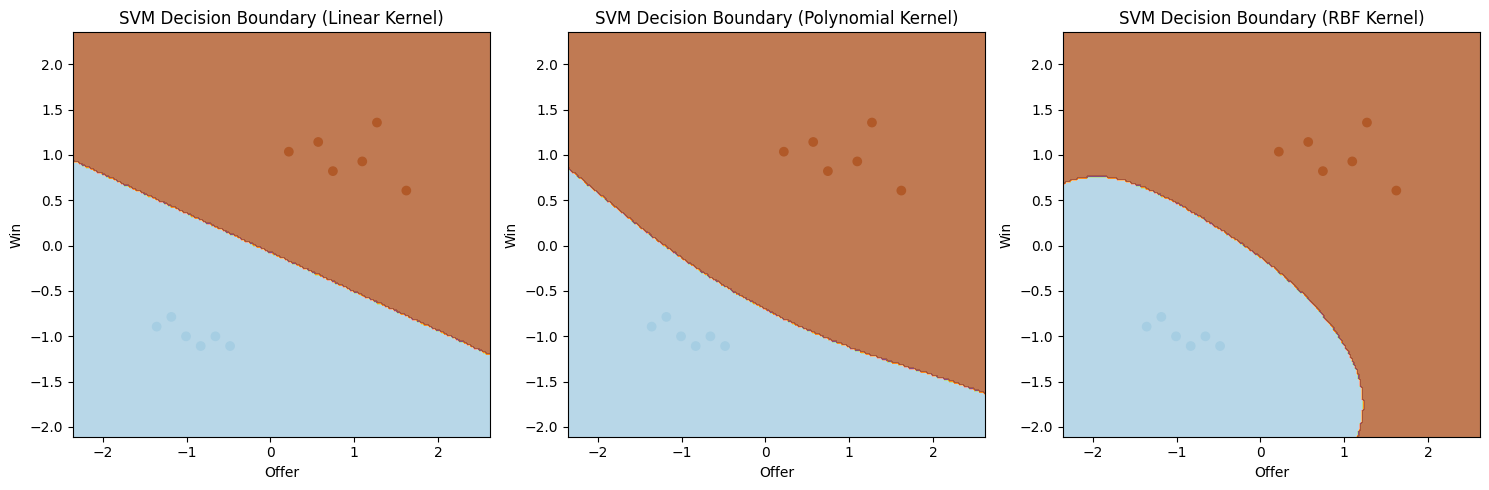

In [15]:
from matplotlib.colors import ListedColormap

# Select features for visualization
feature1 = 'Offer'
feature2 = 'Win'

# Extract features and target variable
X = df[[feature1, feature2]]
y = df['Class']

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM classifier with linear kernel
svm_classifier_linear = SVC(kernel='linear')
svm_classifier_linear.fit(X_scaled, y_encoded)

# Fit SVM classifier with polynomial kernel
svm_classifier_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
svm_classifier_poly.fit(X_scaled, y_encoded)

# Fit SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_rbf.fit(X_scaled, y_encoded)

# Create meshgrid for visualization
h = 0.02  # Step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundaries
plt.figure(figsize=(15, 5))

# Plot decision boundary with linear kernel
plt.subplot(1, 3, 1)
Z_linear = svm_classifier_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Plot decision boundary with polynomial kernel
plt.subplot(1, 3, 2)
Z_poly = svm_classifier_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary (Polynomial Kernel)')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Plot decision boundary with RBF kernel
plt.subplot(1, 3, 3)
Z_rbf = svm_classifier_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap=plt.cm.Paired)
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.tight_layout()
plt.show()
